### Pie Chart
A `pie chart` is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

In [1]:
%%capture
!pip3 install xlrd

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_can = pd.read_excel(
    'data/canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

In [4]:
df_can.columns = list(map(lambda x: str(x), df_can.columns))

In [5]:
drops = [
    'AREA', 
    'REG', 
    'DEV', 
    'Type', 
    'Coverage'
]
df_can.drop(columns=drops, inplace=True)

In [6]:
columns = {
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName': 'Region'
}

df_can.rename(columns=columns, inplace=True)

In [7]:
df_can.set_index('Country', inplace=True)

In [8]:
df_can['Total'] = df_can.sum(axis=1)

In [9]:
df_continents = df_can.groupby('Continent', axis=0).sum()

* Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
* Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
* Pass in a custom set of colors for continents by passing in `colors` parameter.
* **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.

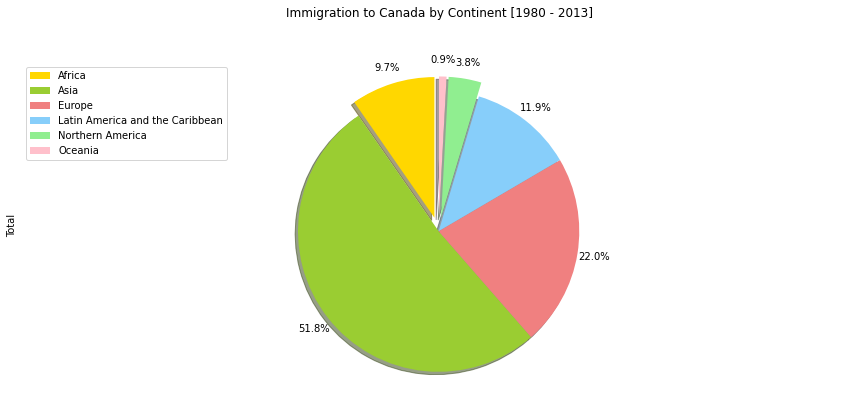

In [10]:
colors_list = [
    'gold', 
    'yellowgreen', 
    'lightcoral', 
    'lightskyblue', 
    'lightgreen', 
    'pink'
]
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(
    kind='pie',
    figsize=(15, 6),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,       
    labels=None,   
    pctdistance=1.12, 
    colors=colors_list, 
    explode=explode_list
)

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()